In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
trainDF = pd.read_csv('train.csv')
print(trainDF.info())
trainDF.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
793,794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C
478,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S


In [3]:
testDF = pd.read_csv('test.csv')
print(testDF.info())
testDF.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
245,1137,1,"Kenyon, Mr. Frederick R",male,41.0,1,0,17464,51.8625,D21,S
82,974,1,"Case, Mr. Howard Brown",male,49.0,0,0,19924,26.0000,NaN,S
59,951,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C


In [4]:
concatDF = pd.concat([trainDF,testDF])
concatDF = concatDF.reset_index(drop=True)
pd.get_dummies(concatDF,columns=['Sex','Embarked']).drop(columns=['PassengerId','Name','Ticket','Cabin']).corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.124617,0.124617,-0.269658,0.230491,0.096335
Age,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740,-0.063645,0.063645,0.085777,-0.019458,-0.075972
SibSp,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238,0.109609,-0.109609,-0.048396,-0.048678,0.075198
Parch,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539,0.213125,-0.213125,-0.008635,-0.100943,0.073258
Fare,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000,0.185523,-0.185523,0.286269,-0.130059,-0.172683
Sex_female,0.543351,-0.124617,-0.063645,0.109609,0.213125,0.185523,1.000000,-1.000000,0.066564,0.088651,-0.119504
Sex_male,-0.543351,0.124617,0.063645,-0.109609,-0.213125,-0.185523,-1.000000,1.000000,-0.066564,-0.088651,0.119504
Embarked_C,0.168240,-0.269658,0.085777,-0.048396,-0.008635,0.286269,0.066564,-0.066564,1.000000,-0.164166,-0.775441
Embarked_Q,0.003650,0.230491,-0.019458,-0.048678,-0.100943,-0.130059,0.088651,-0.088651,-0.164166,1.000000,-0.489874


In [5]:
# featuredDF = pd.read_csv('train4.csv')
# featuredDF['Age'] = featuredDF['Age']/featuredDF['Age'].max()
# featuredDF['Fare'] = featuredDF['Fare']/featuredDF['Fare'].max()
# featuredDF['SibSp'] = featuredDF['SibSp']/featuredDF['SibSp'].max()
# featuredDF['Parch'] = featuredDF['Parch']/featuredDF['Parch'].max()
# featuredDF['Ticket'] = featuredDF['Ticket']/featuredDF['Ticket'].max()
# featuredDF

In [6]:
# featuredDF = pd.read_csv('train5.csv')
# featuredDF['Age'] = featuredDF['Age']/featuredDF['Age'].max()
# featuredDF['Fare'] = featuredDF['Fare']/featuredDF['Fare'].max()
# featuredDF

In [7]:
featuredDF = pd.read_csv('train6.csv')
featuredDF['Age'] = featuredDF['Age']/featuredDF['Age'].max()
featuredDF['Fare'] = featuredDF['Fare']/featuredDF['Fare'].max()
featuredDF['SibSp'] = featuredDF['SibSp']/featuredDF['SibSp'].max()
featuredDF['Parch'] = featuredDF['Parch']/featuredDF['Parch'].max()
featuredDF['Ticket'] = featuredDF['Ticket']/featuredDF['Ticket'].max()
featuredDF= pd.get_dummies(featuredDF,columns=['Pclass','Sex','Embarked','Name','Cabin'])
featuredDF

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,...,Name_ the Countess,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T
0,1,0.0,0.27500,0.125,0.000000,0.090909,0.014151,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,2,1.0,0.47500,0.125,0.000000,0.181818,0.139136,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,3,1.0,0.32500,0.000,0.000000,0.090909,0.015469,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,4,1.0,0.43750,0.125,0.000000,0.181818,0.103644,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,5,0.0,0.43750,0.000,0.000000,0.090909,0.015713,False,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,0.33750,0.000,0.000000,0.090909,0.015713,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1305,1306,NaN,0.48750,0.000,0.000000,0.272727,0.212559,True,False,False,...,False,False,False,True,False,False,False,False,False,False
1306,1307,NaN,0.48125,0.000,0.000000,0.090909,0.014151,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1307,1308,NaN,0.33750,0.000,0.000000,0.090909,0.015713,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [8]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
device

'mps'

In [9]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, DF:pd.DataFrame):
        self.PassengerId= DF['PassengerId'].values
        self.Servived = pd.get_dummies(DF['Survived']).values
        DF = DF.drop(columns=['PassengerId','Survived'])
        self.data = DF.astype(float).values
        pass

    def __len__(self):
        return len(self.PassengerId)

    def __getitem__(self, idx):

        id = self.PassengerId[idx]
        x = torch.FloatTensor(self.data[idx])
        y = torch.FloatTensor(self.Servived[idx])
        x = x.to(device)
        y = y.to(device)
        return x, y , id


dataSet = MyDataset(DF=featuredDF[:891])
testSet = MyDataset(DF=featuredDF[891:])
testSet[0]

(tensor([0.4313, 0.0000, 0.0000, 0.0909, 0.0153, 0.0000, 0.0000, 1.0000, 0.0000,
         1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 1.0000, 0.0000], device='mps:0'),
 tensor([], device='mps:0'),
 892)

In [10]:

trainSet, valSet = torch.utils.data.random_split(dataSet,(0.7,0.3))

In [11]:
trainLoader= torch.utils.data.DataLoader(trainSet,batch_size=1024,sampler=torch.utils.data.RandomSampler(trainSet))
valLoader= torch.utils.data.DataLoader(valSet,batch_size=1024,sampler=torch.utils.data.RandomSampler(valSet))
testLoader = torch.utils.data.DataLoader(testSet,batch_size=1024)
next(iter(trainLoader))

[tensor([[0.2000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.2375, 0.1250, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.1250, 0.0000, 0.2222,  ..., 0.0000, 1.0000, 0.0000],
         ...,
         [0.2250, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
         [0.6500, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
         [0.7875, 0.1250, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
        device='mps:0'),
 tensor([[0., 1.],
         [0., 1.],
         [1., 0.],
         ...,
         [1., 0.],
         [1., 0.],
         [0., 1.]], device='mps:0'),
 tensor([505, 292, 420, 614, 696, 845,  60, 119, 434, 224,  85, 821, 177, 565,
         633, 860, 676, 121, 277, 375, 169, 587, 295,  82, 466, 808, 105, 847,
         740, 478, 820,  40, 304, 616, 610, 575,   6, 269, 572, 834, 192, 310,
         227, 533, 110, 663, 206, 380, 623, 583, 278,  91, 660, 149, 130, 332,
         548, 394,  57, 464, 529, 858, 768, 151, 416, 539, 163, 212, 128, 772,
         405, 468, 241,  56, 

In [12]:
# Define model
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = torch.nn.Sequential(
            torch.nn.Linear(40, 40),
            torch.nn.ReLU(),
            torch.nn.Linear(40, 2),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
model

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=40, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=2, bias=True)
  )
)

[1] cnt: 0 - valLoss: 0.6249459385871887 - trainLoss: 0.668856680393219
[1] cnt: 0 - valLoss: 0.5876710414886475 - trainLoss: 0.6302855014801025
[1] cnt: 0 - valLoss: 0.5468934178352356 - trainLoss: 0.5979230999946594
[1] cnt: 0 - valLoss: 0.5067541003227234 - trainLoss: 0.562787652015686
[1] cnt: 0 - valLoss: 0.47277796268463135 - trainLoss: 0.5287901759147644
[1] cnt: 0 - valLoss: 0.4490484893321991 - trainLoss: 0.5007523894309998
[1] cnt: 0 - valLoss: 0.4338691532611847 - trainLoss: 0.4814339578151703
[1] cnt: 0 - valLoss: 0.425301194190979 - trainLoss: 0.4693109691143036
[1] cnt: 0 - valLoss: 0.4191795587539673 - trainLoss: 0.4616797864437103
[1] cnt: 0 - valLoss: 0.4155835807323456 - trainLoss: 0.45642295479774475
[1] cnt: 0 - valLoss: 0.41208410263061523 - trainLoss: 0.4523555636405945
[1] cnt: 0 - valLoss: 0.4099859595298767 - trainLoss: 0.4490709602832794
[1] cnt: 0 - valLoss: 0.40719810128211975 - trainLoss: 0.44624799489974976
[1] cnt: 0 - valLoss: 0.40575021505355835 - train

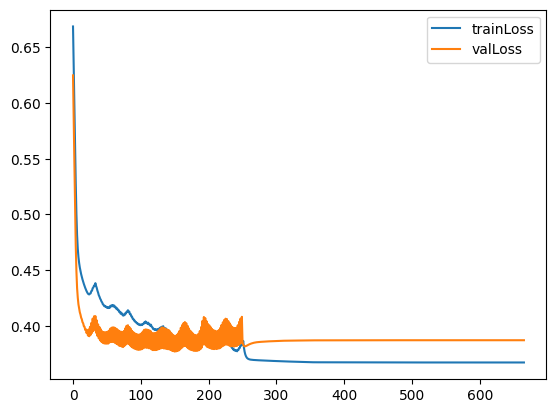

In [13]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer,1,0.1)

trainLoss=[]
valLoss=[]

for phase in range(5):
    bestModel = model
    bestLoss = float('inf')
    cnt=0


    while(cnt<100):
        model.train()
        trainL=0
        for X, y,_ in trainLoader:

            # Compute prediction error
            pred = model(X)
            loss = loss_fn(pred, y)
            trainL+=loss.item()

            # Backpropagation
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()


        model.eval()
        valL=0
        with torch.no_grad():
            for X ,y,_ in valLoader:
                pred = model(X)
                loss = loss_fn(pred, y)
                # for i in loss:
                valL+= loss.item()


        trainLoss.append(trainL)
        valLoss.append(valL)

        if bestLoss<valLoss[-1]:
            cnt+=1
        else:
            cnt = 0
            bestLoss = valLoss[-1]
            bestModel = model
    
        print(f'{scheduler.get_last_lr()} cnt: {cnt} - valLoss: {valLoss[-1]} - trainLoss: {trainLoss[-1]}')

    model = bestModel
    scheduler.step()

plt.plot(trainLoss,label='trainLoss')
plt.plot(valLoss,label='valLoss')
plt.legend()

In [14]:
def accuracyAI(dataloader, model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X, y, _  in dataloader:
            pred = model(X)

            for idx, i in enumerate(pred):
                if torch.argmax(i)== torch.argmax(y[idx]):
                    correct +=1 
                total+=1
    return correct / total

accuracyAI(valLoader, bestModel)

0.8539325842696629

In [15]:
def testAI(dataloader, model):
    model.eval()
    result = []
    with torch.no_grad():
        for X ,_ , id in dataloader:
            pred = model(X)
            for idx, i in enumerate(pred):
                result.append([id[idx],torch.argmax(i).item()])
    return result

result = testAI(testLoader, bestModel)
result = pd.DataFrame(result)
result = result.astype(int)
result.columns=['passengerId','Survived']
result

,passengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [16]:
result.to_csv('result.csv',index=False)